# Detección de rostros con Mediapipe

## Opciones de Configuración

### Entrada 

- MODEL_SELECTION: Un índice entero `0 o 1`. Usar `0` para seleccionar un modelo de corto alcance que funcione mejor para caras a menos de 2 metros de la cámara, y `1` para un modelo de rango completo mejor para caras de 5 metros. Para la opción de rango completo, se utiliza un modelo escaso para mejorar su velocidad de inferencia. Predeterminado a 0 si no se especifica.

`Nota: No disponible para JavaScript ( use “ model ” en su lugar ).`

- MODEL: Un valor de cadena para indicar qué modelo se debe usar. Use `“ short ”` para seleccionar un modelo de corto alcance que funcione mejor para caras a menos de 2 metros de la cámara, y `“ full ” `para un modelo de rango completo mejor para caras dentro de 5 metros. Para la opción de rango completo, se utiliza un modelo escaso para mejorar su velocidad de inferencia. Consulte las tarjetas modelo para más detalles. 

`Nota: Válido solo para solución JavaScript.`

- SELFIE_MODE: Un valor booleano para indicar si se voltean las imágenes / cuadros de video horizontalmente o no. Predeterminado a false.

Nota: Válido solo para solución JavaScript.

- MIN_DETECTION_CONFIDENCE: Valor mínimo de confianza `([0.0, 1.0])` del modelo de detección facial para que la detección se considere exitosa. Predeterminado a `0.5.`

### Salida

- DETECCIONES: Colección de caras detectadas, donde cada cara se representa como un mensaje de detección de proto que contiene un cuadro delimitador y `6 puntos clave ( ojo derecho, ojo izquierdo, punta de la nariz, centro de la boca, tragión de la oreja derecha y tragión de la oreja izquierda )`. El cuadro delimitador está compuesto por `xmin y width` ( ambos normalizados a `[0.0, 1.0]` por el ancho de imagen ) y `ymin y height` ( ambos normalizados a `[0.0, 1.0]` por la altura de la imagen ). Cada punto clave está compuesto por `x y y`, que están normalizados a `[0.0, 1.0]` por el ancho y la altura de la imagen respectivamente.

[https://google.github.io/mediapipe/solutions/face_detection.htmlFuente](https://google.github.io/mediapipe/solutions/face_detection.html)

## Face Deteccion en Imagenes 

In [157]:
import cv2 as cv
import mediapipe as mp 
mp_face_detection = mp.solutions.face_detection

#help(mp_face_detection.FaceDetection)

In [80]:
# Preparamos las especificaciones para dibujar las marcas en el rostro 
mp_drawing = mp.solutions.drawing_utils 
drawing_spec = mp_drawing.DrawingSpec(thickness=2, circle_radius=2)


In [81]:
## Confguramos el detector  
face_detection = mp_face_detection.FaceDetection(min_detection_confidence=0.5,
                                                model_selection=1)

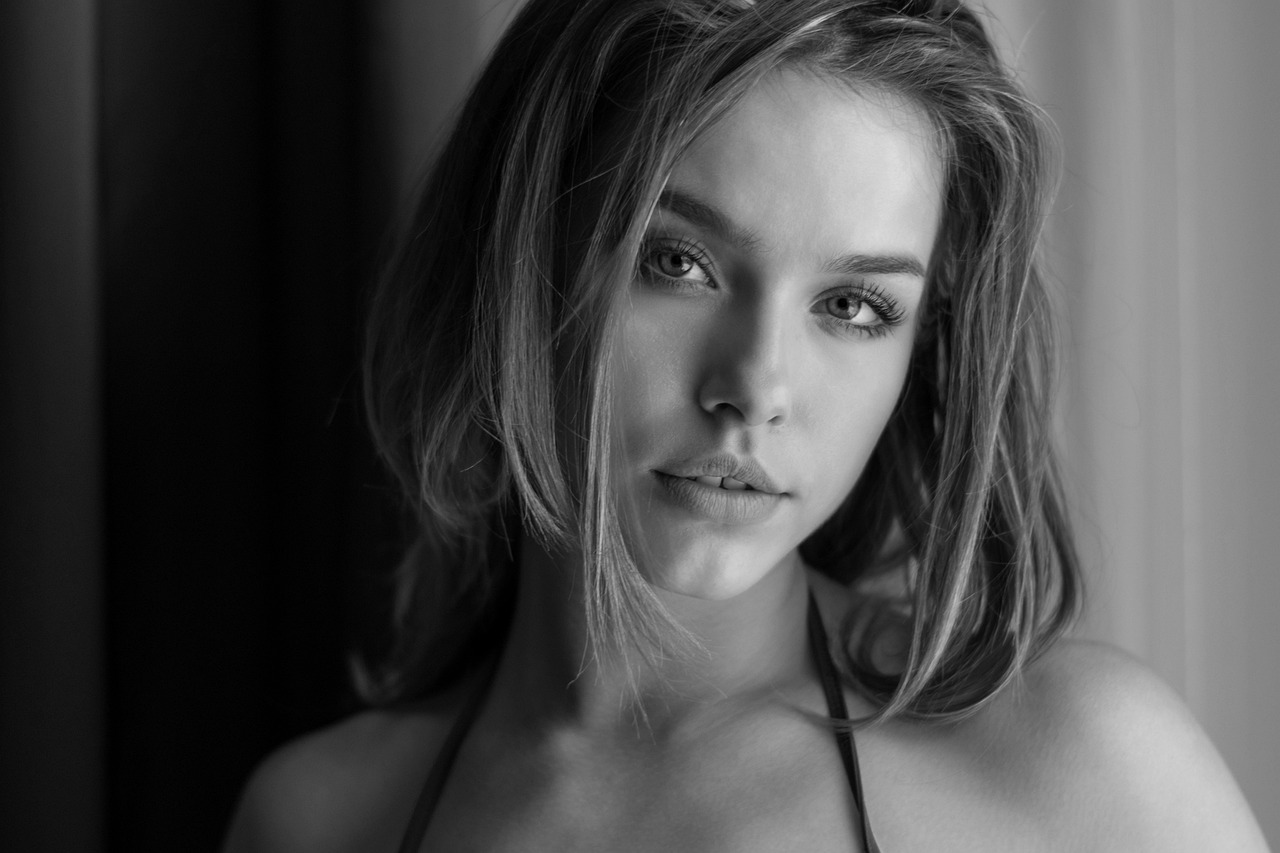

In [149]:
## mostramos la imagen con la cual vamos a trabajar
from IPython.display import Image
path = "woman2.jpg"
Image(path)

In [150]:
## Cargamos la imagen de trabajo y realizamos un cambio de espacio de color a RGB
img = cv.imread(path)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)


In [151]:
## Realizamos la predicción
results = face_detection.process(img)

In [152]:
## Si resultado es diferente de null iteramos sobre los resultados mostrando los datos devueltos
if results.detections:
    for detection in results.detections:
        print(detection)
else:
    print("sin deteccion")

label_id: 0
score: 0.6144654750823975
location_data {
  format: RELATIVE_BOUNDING_BOX
  relative_bounding_box {
    xmin: 0.41558969020843506
    ymin: 0.17499315738677979
    width: 0.35109758377075195
    height: 0.5266951322555542
  }
  relative_keypoints {
    x: 0.5263214707374573
    y: 0.3205121159553528
  }
  relative_keypoints {
    x: 0.667746901512146
    y: 0.3702229857444763
  }
  relative_keypoints {
    x: 0.5892981886863708
    y: 0.47020047903060913
  }
  relative_keypoints {
    x: 0.5689229965209961
    y: 0.5720545649528503
  }
  relative_keypoints {
    x: 0.4270050525665283
    y: 0.3300142288208008
  }
  relative_keypoints {
    x: 0.7192894220352173
    y: 0.4350481629371643
  }
}



In [153]:
# Dibujamos los resultados, caja delimitadora y puntos dereferencia 
if results.detections:
    for detection in results.detections:
        mp_drawing.draw_detection(img, detection)
else:
    print("sin deteccion")

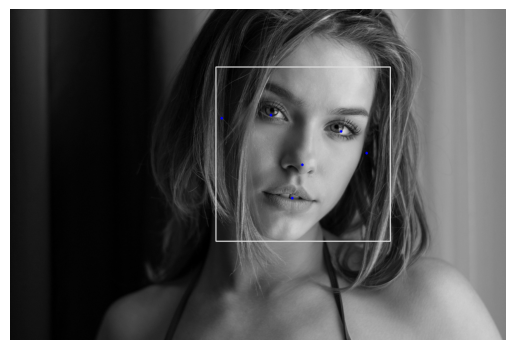

In [154]:
## mostramos los resultados obtenidos en la imagen 
import matplotlib.pyplot as plt
plt.imshow(img)
plt.axis("off"),
plt.show()

## Obteniendo los datos de los resultados 

### Cuadro delimitador


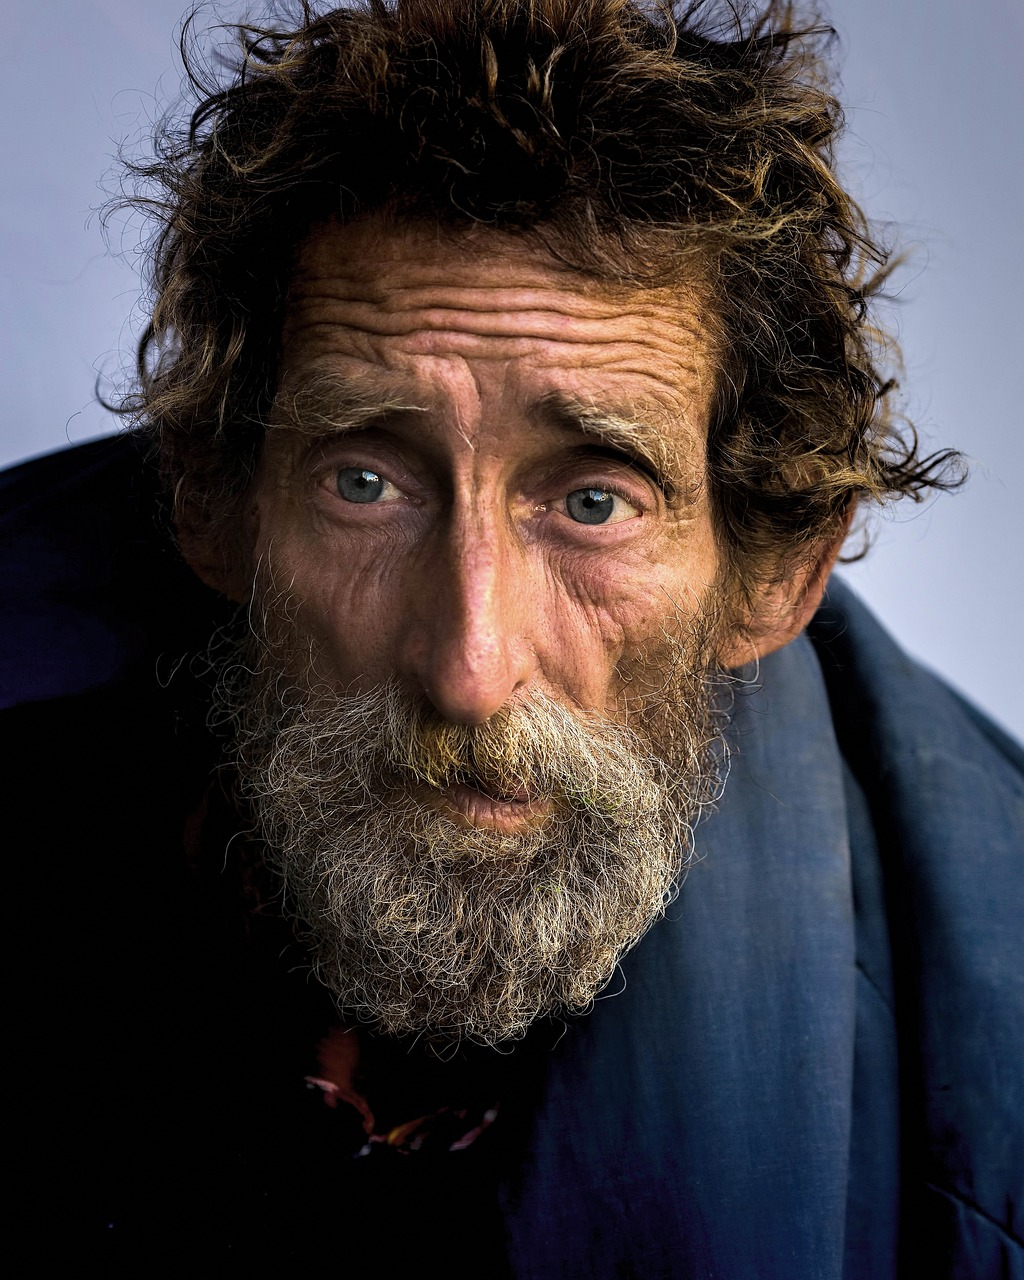

In [188]:
import cv2 as cv
import mediapipe as mp 
mp_face_detection = mp.solutions.face_detection

# Preparamos las especificaciones para dibujar las marcas en el rostro 
mp_drawing = mp.solutions.drawing_utils 
drawing_spec = mp_drawing.DrawingSpec(thickness=2, circle_radius=2)

## Confguramos el detector  
face_detection = mp_face_detection.FaceDetection(min_detection_confidence=0.5,
                                                model_selection=1)

## mostramos la imagen con la cual vamos a trabajar
from IPython.display import Image
path = "man2.jpg"
Image(path)

xmin: 0.21472355723381042
ymin: 0.24087896943092346
width: 0.4766136705875397
height: 0.38130584359169006



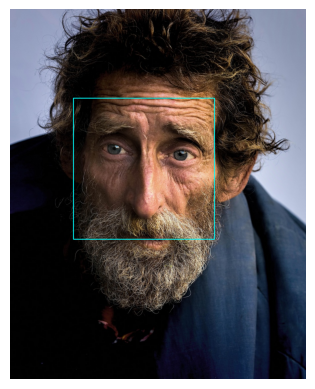

In [189]:
img_res = cv.imread(path)
img_res = cv.cvtColor(img_res, cv.COLOR_BGR2RGB)

### ------PRIMERA PARTE-----------

## Realizamos la predicción
results = face_detection.process(img_res)
xmin, ymin, width, height 
# Obtenemos la cordenada inicial y el anch y alto de nuestra caja delimitadora.
if results.detections:
    for detection in results.detections:
        
        print(detection.location_data.relative_bounding_box)
        face_box = detection.location_data.relative_bounding_box
        
        xmin, ymin = face_box.xmin, face_box.ymin
        width, height= face_box.width, face_box.height
        
### ----------SEGUNDA PARTE-------------
        h,w,c = img_res.shape
        xmin, ymin = int(xmin*w), int(ymin*h)
        xmax, ymax = int(xmin+width*w), int(ymin+height*h)

        img_res = cv.rectangle(img_res,(xmin,ymin),(xmax, ymax), (0,255,255), 2,2)
        
else:
    print("sin deteccion")  
    


plt.imshow(img_res)
plt.axis("off")
plt.show()

### Obtencion de los Puntos Clave 

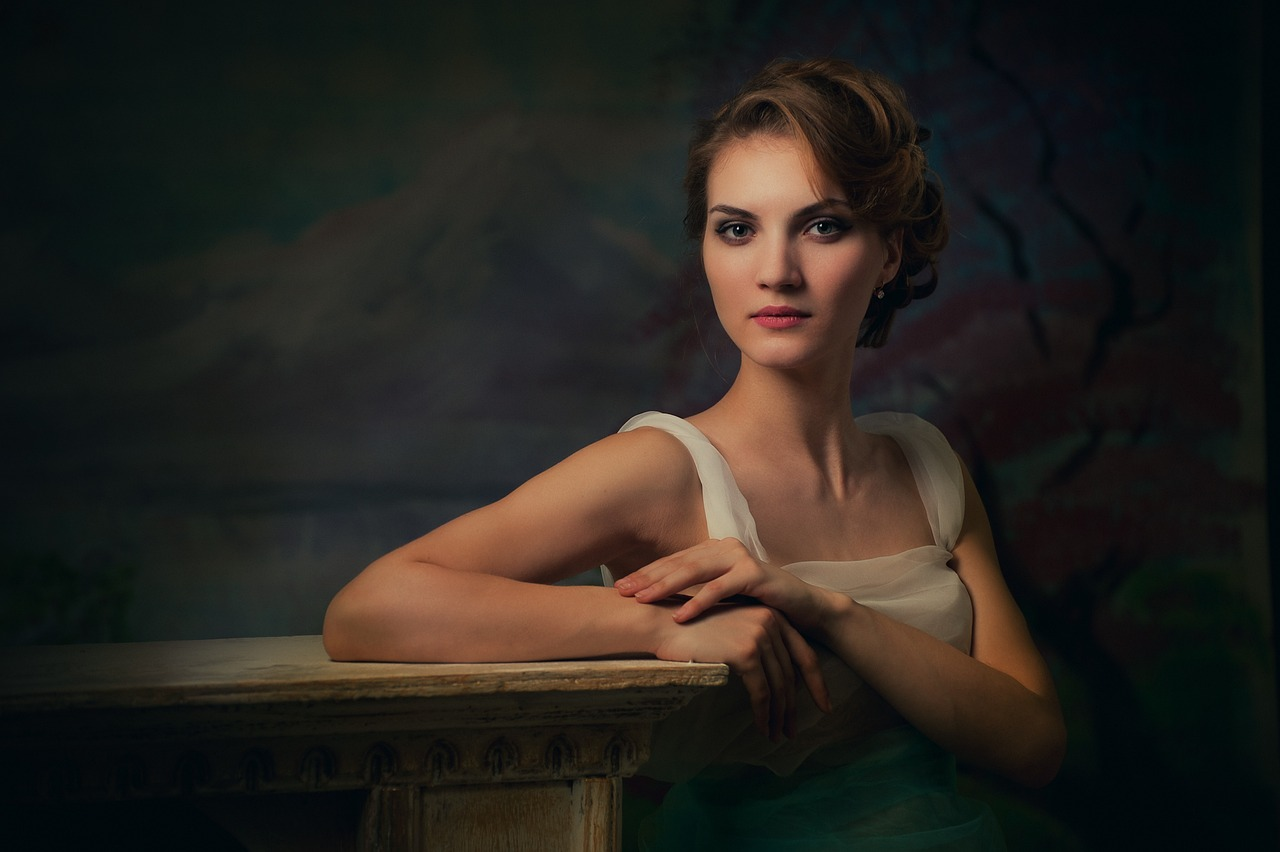

In [3]:

## mostramos la imagen con la cual vamos a trabajar
from IPython.display import Image
path = "mujer.jpg"
Image(path)

x: 0.577812671661377
y: 0.27933332324028015

x: 0.6394147872924805
y: 0.27711430191993713

x: 0.6037355065345764
y: 0.33734801411628723

x: 0.6060826182365417
y: 0.37629416584968567

x: 0.5544253587722778
y: 0.2938792407512665

x: 0.6839714050292969
y: 0.2912231385707855



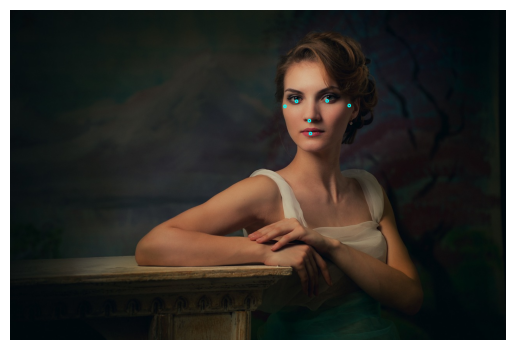

In [191]:
img_or = cv.imread(path)
img_or = cv.cvtColor(img_or, cv.COLOR_BGR2RGB)

img_res = img_or.copy()
### PRIMERA PARTE
h,w,c = img_res.shape
## Realizamos la predicción
results = face_detection.process(img_res)
# Obtenemos la cordenada inicial y el anch y alto de nuestra caja delimitadora.
dim_puntos=[]
if results.detections:
    for detection in results.detections:
        #print(detection.location_data.relative_keypoints)
        dim_puntos.clear()
        key_points = detection.location_data.relative_keypoints
        for ide,point in enumerate(key_points):
            dim_puntos.append((int(point.x*w), int(point.y*h)))
            
            print(point)
        for punto in dim_puntos:
            img_res=cv.circle(img_res,punto,3,(0,255,255),2)
        
        
        
else:
    print("sin deteccion") 
    
plt.imshow(img_res)
plt.axis("off")
plt.show()

## Deteccion en Tiempo real

#### Ejemplo 1 utilizando la funcion propia de mediapipe para dibujar

In [6]:
import cv2 as cv
import mediapipe as mp

mp_face_detection = mp.solutions.face_detection

# Preparamos las especificaciones para dibujar las marcas en el rostro 
mp_drawing = mp.solutions.drawing_utils 
drawing_spec = mp_drawing.DrawingSpec(thickness=2, circle_radius=2)

## Confguramos el detector  
face_detection = mp_face_detection.FaceDetection(min_detection_confidence=0.5,
                                                model_selection=1)

def face_detect(img_pros):
    
    img_pros = cv.cvtColor(img_pros, cv.COLOR_BGR2RGB)
    results = face_detection.process(img_pros)
    
    if results.detections:
        for detection in results.detections:
            mp_drawing.draw_detection(img_pros, detection)
    img_pros = cv.cvtColor(img_pros, cv.COLOR_RGB2BGR)
    return img_pros
            
##----------PRINCIPAL CODDE -------------------
cv.namedWindow("Face Detection", cv.WINDOW_NORMAL)

cap = cv.VideoCapture(0)

while cap.isOpened():
    
    ret, frame= cap.read()
    if ret:
        
        img_ret = face_detect(frame)
        cv.imshow("Face Detection", img_ret)
        
        key = cv.waitKey(5)
        if key==27:
            break
    else:
        break
        
cap.release()
cv.destroyAllWindows()
    

In [2]:
cv.destroyAllWindows()

## Ejemplo 2 Utilizando las funciones de opencv para dibujar 

In [15]:
import cv2 as cv
import mediapipe as mp

mp_face_detection = mp.solutions.face_detection

# Preparamos las especificaciones para dibujar las marcas en el rostro 
mp_drawing = mp.solutions.drawing_utils 
drawing_spec = mp_drawing.DrawingSpec(thickness=2, circle_radius=2)

## Confguramos el detector  
face_detection = mp_face_detection.FaceDetection(min_detection_confidence=0.5,
                                                model_selection=1)

##------------------------------------------------------------------------------------------
def face_detect(img_pros):
    
    img_pros = cv.cvtColor(img_pros, cv.COLOR_BGR2RGB)
    results = face_detection.process(img_pros)
    if results.detections:
    
        img_pros = draw_box(results,img_pros)
        img_pros = draw_points(results, img_pros)
      
    img_pros = cv.cvtColor(img_pros, cv.COLOR_RGB2BGR)
    return img_pros
##--------------------------------------------------------------------------------------------
def draw_box(results, img_pros):
    
    if results.detections:
        
        for detection in results.detections:

            face_box = detection.location_data.relative_bounding_box

            xmin, ymin = face_box.xmin, face_box.ymin
            width, height= face_box.width, face_box.height

            h,w,c = img_pros.shape
            xmin, ymin = int(xmin*w), int(ymin*h)
            xmax, ymax = int(xmin+width*w), int(ymin+height*h)

            img_pros = cv.rectangle(img_pros,(xmin,ymin),(xmax, ymax), (0,255,255), 2,2)
    return img_pros
##-------------------------------------------------------------------------------------------  
def draw_points(results, img_pros):
    
    dim_puntos=[]
    h,w,c = img_pros.shape
    if results.detections:
        for detection in results.detections:
            
            dim_puntos.clear()
            key_points = detection.location_data.relative_keypoints
            for ide,point in enumerate(key_points):
                dim_puntos.append((int(point.x*w), int(point.y*h)))

            for punto in dim_puntos:
                img_res=cv.circle(img_pros,punto,3,(0,255,255),-1)
    return img_pros
            
##----------PRINCIPAL CODDE -------------------
cv.namedWindow("Face Detection", cv.WINDOW_NORMAL)

cap = cv.VideoCapture(0)

while cap.isOpened():
    
    ret, frame= cap.read()
    if ret:
        
        img_ret = face_detect(frame)
        cv.imshow("Face Detection", img_ret)
        
        key = cv.waitKey(5)
        if key==27:
            break
    else:
        break
        
cap.release()
cv.destroyAllWindows()